# Customer Churn Prediction


Step 1. Imports

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Sklearn imports
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Metrics & utilities
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Display settings
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.05)
pd.set_option('display.max_columns', 200)


Step 2. Load data


In [6]:
# loading dataset
record = pd.read_csv('customer_churn_data.csv')
print("Shape of the dataset:", record.shape)
record.head()

Shape of the dataset: (10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Step 3. Initial Inspection


In [7]:
# info & summary
display(record.info())
display(record.describe(include='all'), True)

# checking for missing values
print("\nMissing values in each column:")
print(record.isnull().sum())

# Target variable distribution
print("\nTarget value counts:")
print(record['churn'].value_counts(normalize=False))

print("\nTarget proportions:")
print(record['churn'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


True


Missing values in each column:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Target value counts:
churn
0    7963
1    2037
Name: count, dtype: int64

Target proportions:
churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


Step 4. Exploratory Data Analysis (visualization)
...distribution of numeric features, relationships with churn and categorical features

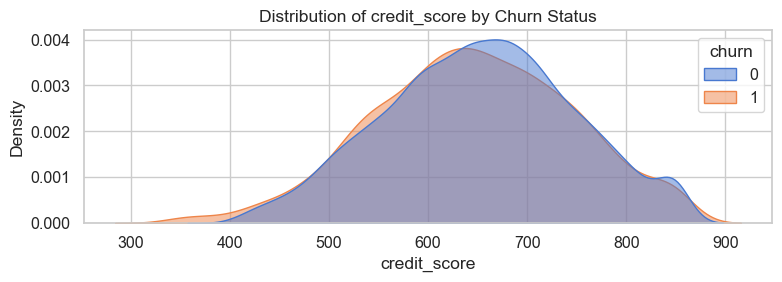

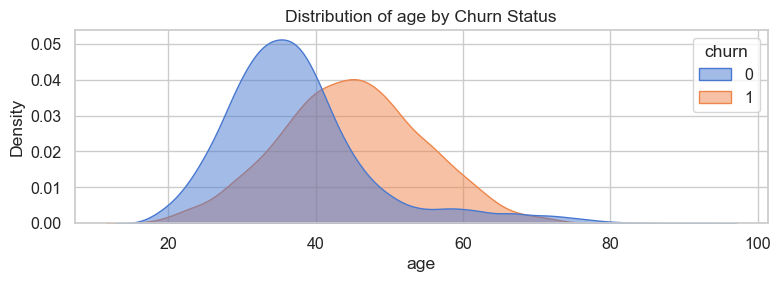

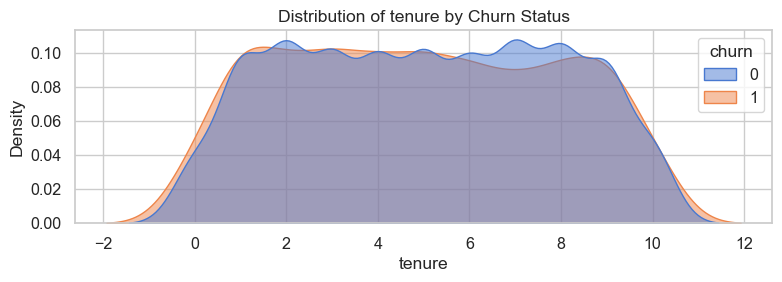

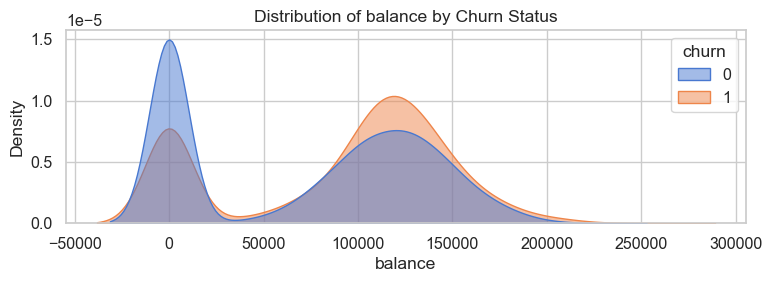

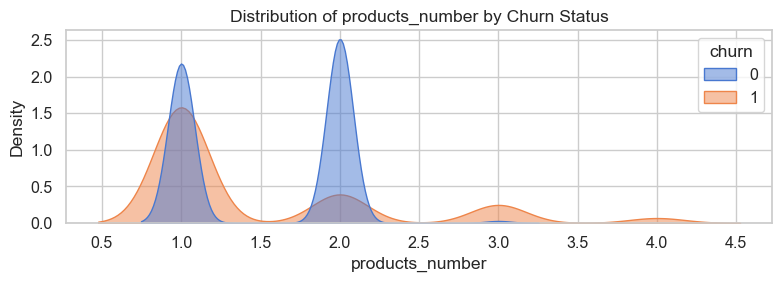

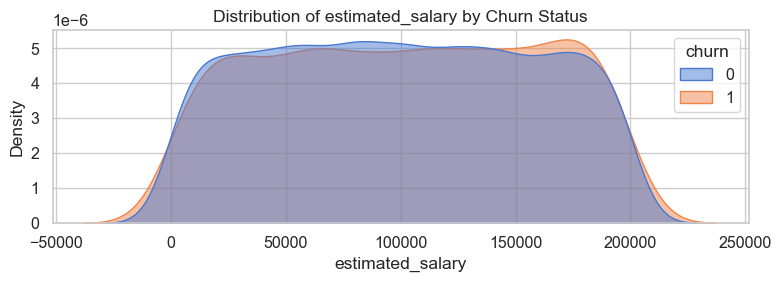

In [8]:
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Visualizing distributions of numeric features
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.kdeplot(data=record, x=col, hue='churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {col} by Churn Status')
    plt.tight_layout()
    plt.show()

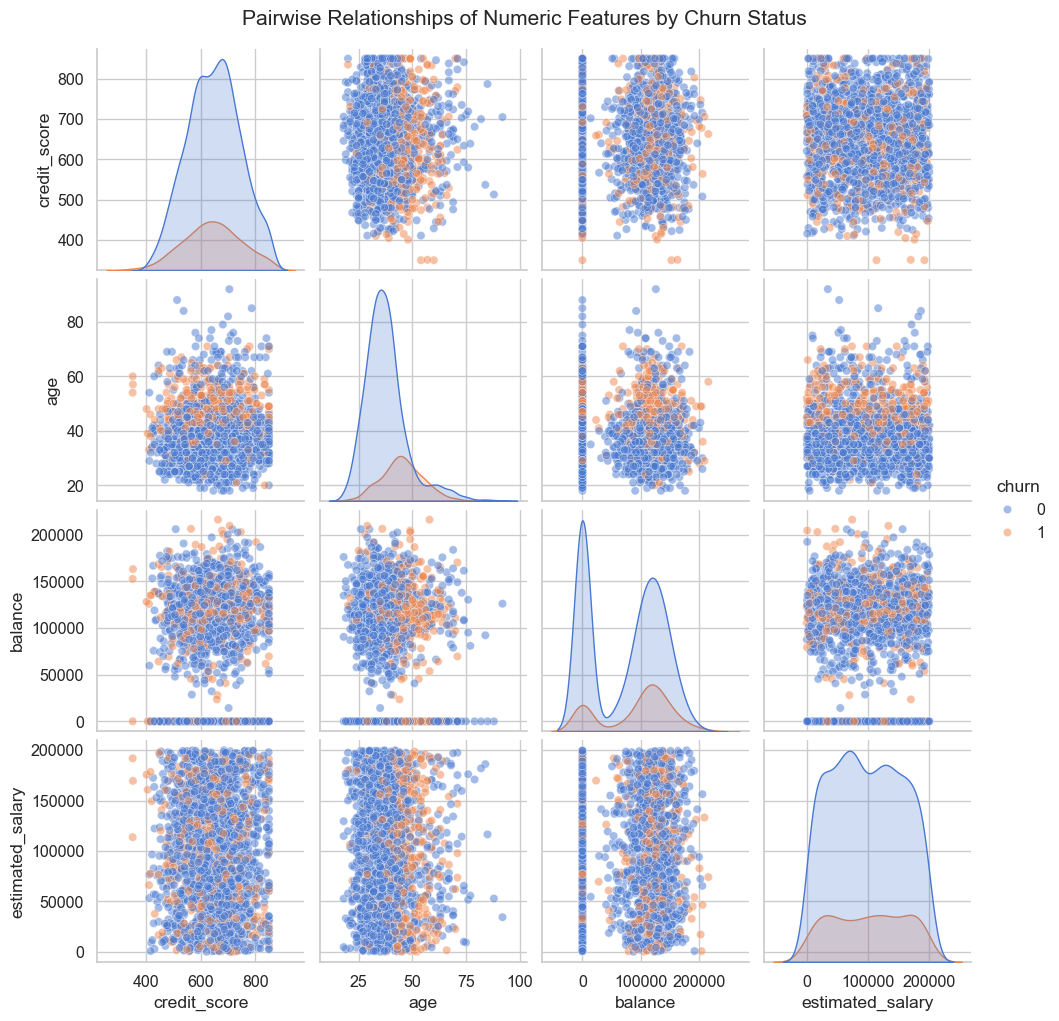

In [9]:
# ... pairplot for numeric features to see relationships between them
sns.pairplot(record.sample(frac=0.2, random_state=42), 
             vars=['credit_score', 'age', 'balance', 'estimated_salary'], 
             hue='churn', diag_kind='kde', plot_kws={'alpha':0.5}
            )
plt.suptitle('Pairwise Relationships of Numeric Features by Churn Status', y=1.02)
plt.show()

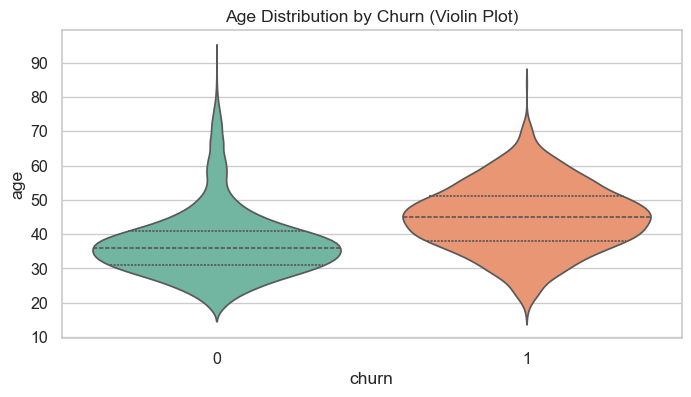

In [10]:
# Violin plots for Age 
plt.figure(figsize=(8, 4))
sns.violinplot(data=record, x='churn', y='age', palette='Set2', inner='quart')
plt.title('Age Distribution by Churn (Violin Plot)')
plt.show()

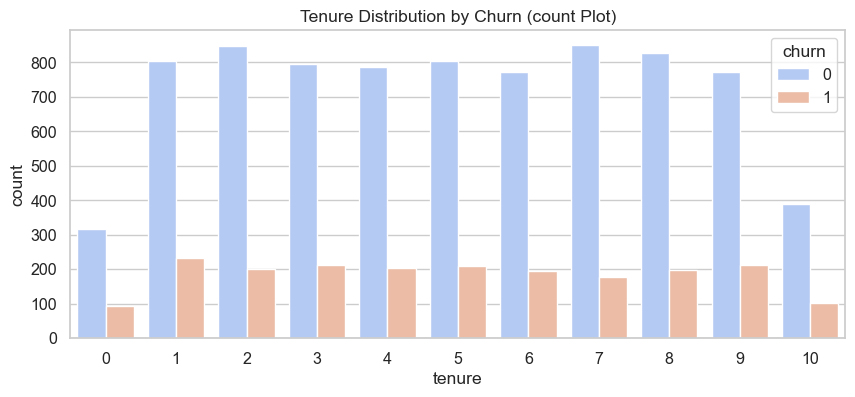

In [11]:
# Tenure distribution by Churn (useful for subscription length analysis and retention strategies)
plt.figure(figsize=(10, 4))
sns.countplot(data=record, hue='churn', x='tenure', palette='coolwarm')
plt.title('Tenure Distribution by Churn (count Plot)')
plt.show()

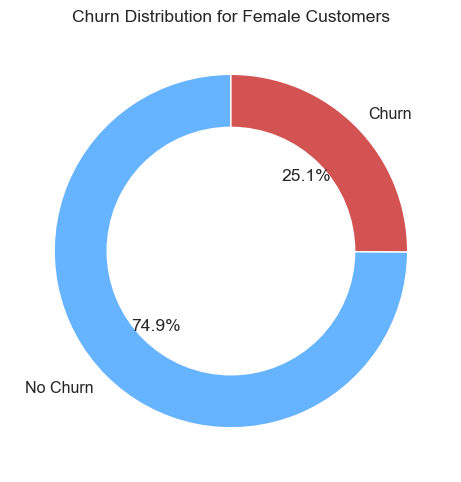

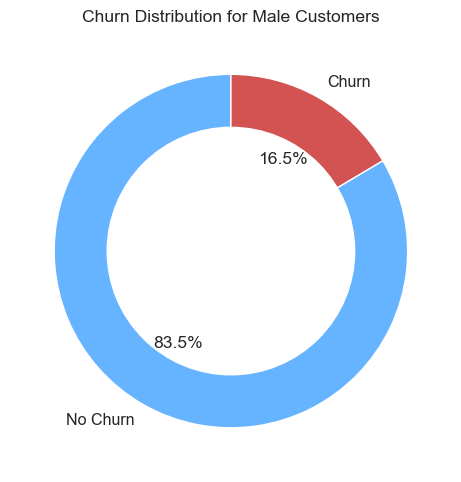

In [12]:
# Gender vs Churn (Donut chart). This is important to understand the impact of gender on churn rates. 
# To know if there is any bias towards a particular gender, we can visualize the churn rates using a donut chart.
# And to know whether marketing strategies should be tailored based on gender, we can analyze the churn rates accordingly.
# Its a powerful visualization to understand the demographic influence on customer churn.

gender_counts = record.groupby('gender')['churn'].value_counts(normalize=True).unstack().fillna(0)

for gender in gender_counts.index:
    plt.figure(figsize=(5, 5))
    plt.pie(gender_counts.loc[gender], labels=['No Churn', 'Churn'],
            autopct='%1.1f%%', startangle=90, colors=['#66b3ff',"#d35252"],
            )
    center = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center)
    plt.title(f'Churn Distribution for {gender} Customers')
    plt.tight_layout()
    plt.show()


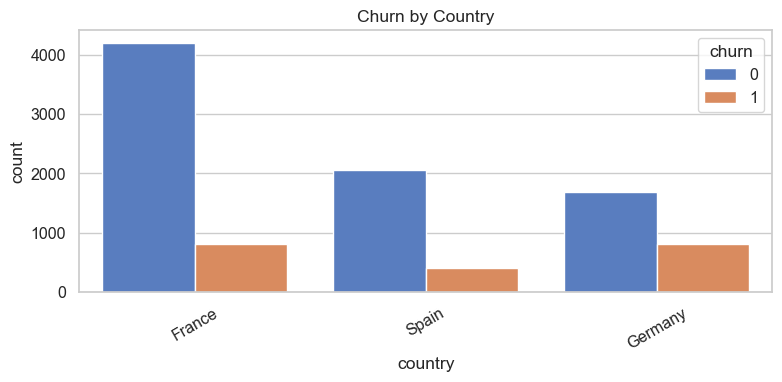

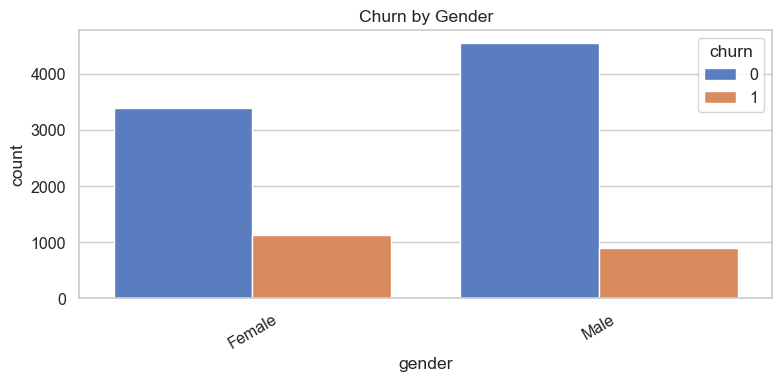

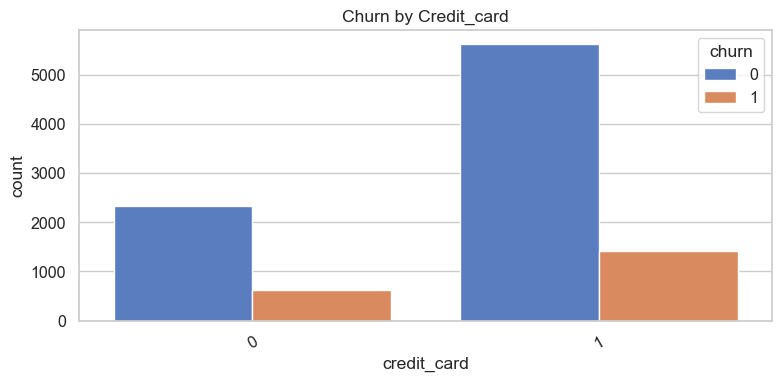

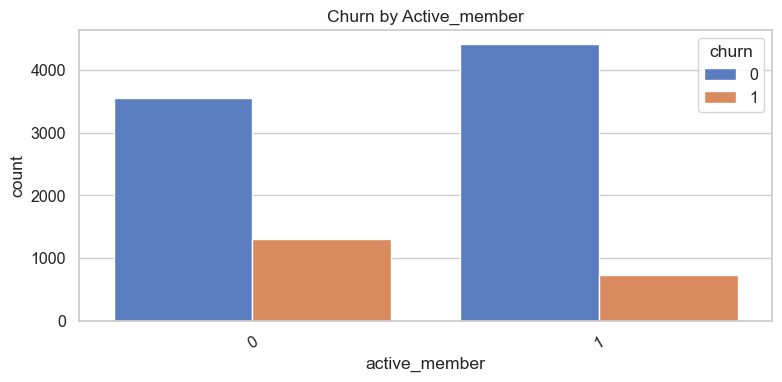

In [13]:
# Categorical features vs Churn (Bar plots)
category_cols = ['country', 'gender', 'credit_card', 'active_member']
for category in category_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=record, x=category, hue='churn')
    plt.title(f'Churn by {category.capitalize()}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

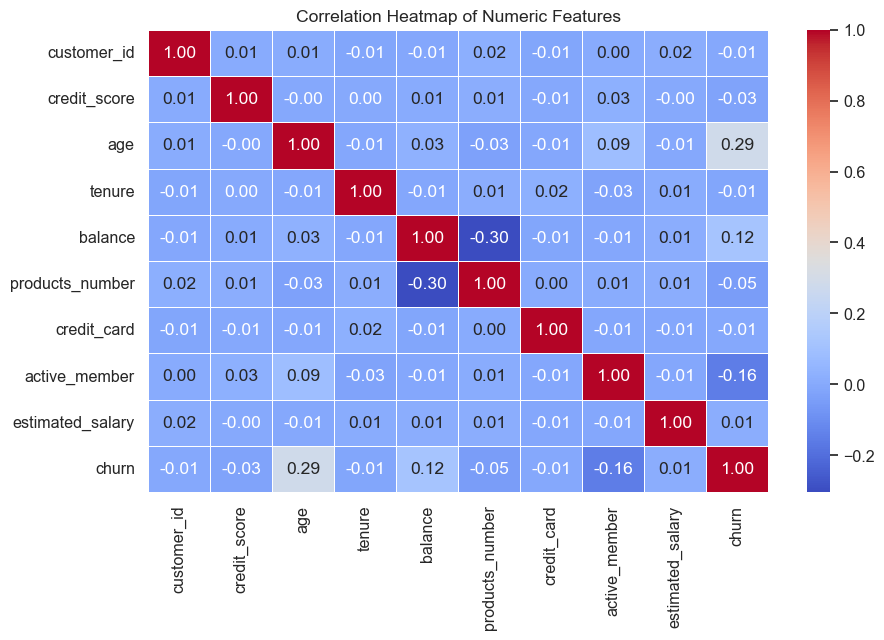

In [17]:
# Heatmap visualization for correlation between numeric features. 
# It is one of the most effective ways used in  Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(record.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [19]:
# Numeric Correlation Heatmap
numeric_data = record[num_cols]
correlation_matrix = numeric_data.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,credit_score,age,tenure,balance,products_number,estimated_salary
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


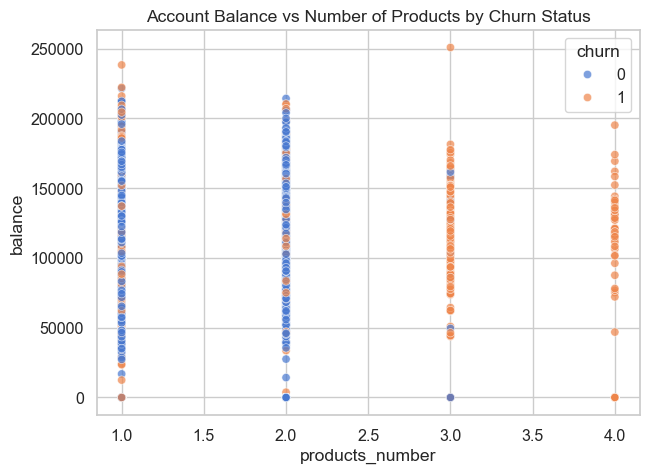

In [21]:
# AccountBalance vs Products Scatter plot to see if there's any relationship between account balance and number of products held by customers.
plt.figure(figsize=(7, 5))
sns.scatterplot(data=record, x='products_number', y='balance', hue='churn', alpha=0.7)
plt.title('Account Balance vs Number of Products by Churn Status')
plt.show()

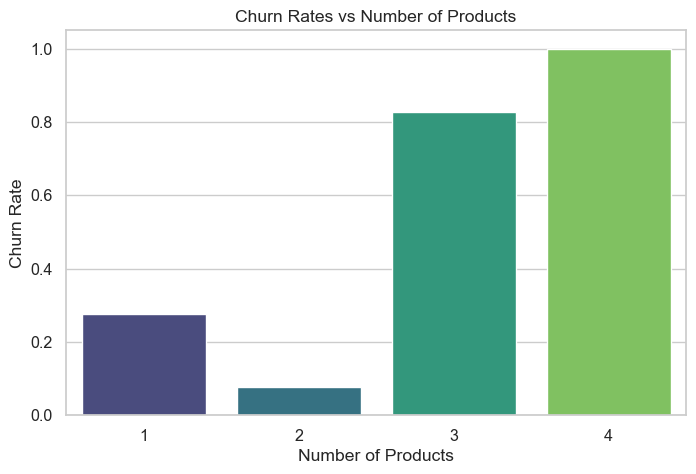

In [22]:
# Aggregate churn rates per number of products to see if customers with more products are less likely to churn.
churn_rates_by_products = record.groupby('products_number')['churn'].mean().reset_index()

# Plotting churn rates by number of products
plt.figure(figsize=(8, 5))
sns.barplot(data=churn_rates_by_products, x='products_number', y='churn', palette='viridis')
plt.title('Churn Rates vs Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()

# Step 5. Feature Engineering
Create meaningful features: e.g account balance per product, age group, salary bracket and handle missing values.



In [23]:
# Feature Engineering examples
# Means creation of new features based on existing ones to enhance model performance.
# It capltueres hidden patterns and relationships within the data that may not be immediately apparent.
# This process can lead to better predictive models.

record_features = record.copy()

# Balance per product feature
record_features['balance_per_product'] = record_features['balance'] / (record_features['products_number'].replace(0, np.nan))
record_features['balance_per_product'].fillna(0, inplace=True)

# Salary bracket feature (to balance ratios)
record_features['salary_balance_ratio'] = record_features['estimated_salary'] / (record_features['balance'].replace(0, np.nan))
record_features['salary_balance_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
record_features['salary_balance_ratio'].fillna(record_features['salary_balance_ratio'].median(), inplace=True)

# Age group featur
record_features['age_group'] = pd.cut(record_features['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])

#Tenure group feature
record_features['tenure_bracket'] = pd.cut(record_features['tenure'], bins=[-1, 0, 2, 5, 10, 100], labels=['0', '1-2', '3-5', '6-10', '10+'])

# High account balance flag
record_features['high_balance'] = (record_features['balance'] > record_features['balance'].quantile(0.75)).astype(int)

#Quick Checks
record_features[['balance_per_product', 'salary_balance_ratio', 'age', 'age_group', 'tenure', 'tenure_bracket', 'high_balance']].head()

,balance_per_product,salary_balance_ratio,age,age_group,tenure,tenure_bracket,high_balance
0,0.000000,0.839258,42,35-44,2,1-2,0
1,83807.860000,1.342864,41,35-44,1,1-2,0
2,53220.266667,0.713585,42,35-44,8,6-10,1
3,0.000000,0.839258,39,35-44,1,1-2,0
4,125510.820000,0.630098,43,35-44,2,1-2,0


Step 6. Pre-processing - encoding & scaling 

In [24]:
# Since ML does not work with categorical data (texts too) directly, we need to encode categorical features into binary vector format.
# Pipelines are a great way to streamline preprocessing and modeling steps.
# Pipelines help ensure that all transformations are applied consistently during both training and testing phases.

# Numerical features are scaled using StandardScaler. To ensure every feature has equal weight and they don't dominate the model due to their scale.

target = 'churn'
columns_dropped = ['customer_id']
features = [col for col in record_features.columns if col not in [target] + columns_dropped]

numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary',
                    'balance_per_product', 'salary_balance_ratio']
categorical_features = ['country', 'gender', 'credit_card', 'active_member', 'age_group', 'tenure_bracket', 'high_balance']

record_features[categorical_features] = record_features[categorical_features].astype('object')

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

print('Numeric features:', numeric_features)
print('Categorical features:', categorical_features)

Numeric features: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'balance_per_product', 'salary_balance_ratio']
Categorical features: ['country', 'gender', 'credit_card', 'active_member', 'age_group', 'tenure_bracket', 'high_balance']


# Train Test Split

In [27]:
# splitting the data into training and testing sets for model evaluation

X = record_features[features]
y = record_features[target]

# stratify = y is used to maintain the same proportion of classes in both training and testing sets as in the original dataset. So that both sets are representative of the overall distribution of the target variable and data is not taken from an imbalanced sample.
#It improves performace consistency of the model by ensuring that both training and testing datasets reflect the same class distribution as the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train shape: ', X_train.shape, 'Test shape: ', X_test.shape)
print('Train churn proportion:', y_train.mean(), 'Test churn proportion: ', y_test.mean())

Train shape:  (8000, 15) Test shape:  (2000, 15)
Train churn proportion: 0.20375 Test churn proportion:  0.2035


# Step 8. Train Multiple models with a pipeline and compare using cross-validation

In [32]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    results[model_name] = cv_scores
    print(f"{model_name} - CV AUC Scores: {cv_scores}, Mean AUC: {cv_scores.mean():.4f}")


LogisticRegression - CV AUC Scores: [0.78841098 0.80567461 0.81884264 0.74785469 0.77796612], Mean AUC: 0.7877
RandomForest - CV AUC Scores: [0.84769722 0.85999966 0.8644793  0.82765263 0.84315859], Mean AUC: 0.8486
GradientBoosting - CV AUC Scores: [0.86371243 0.87070335 0.87088273 0.84439498 0.86419518], Mean AUC: 0.8628
AdaBoost - CV AUC Scores: [0.84846289 0.84640666 0.85630135 0.82141292 0.84122155], Mean AUC: 0.8428
SVC - CV AUC Scores: [0.83246333 0.85047818 0.84308636 0.82142376 0.82818956], Mean AUC: 0.8351


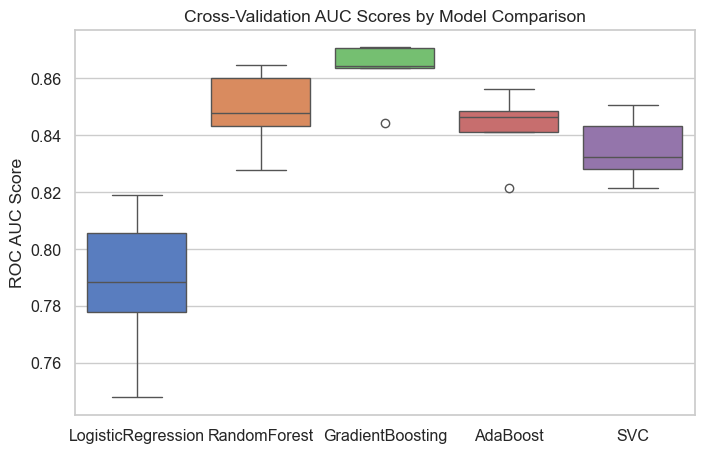

In [33]:
# Boxplot of CV AUC Scores for different models to compare their performance visually.
plt.figure(figsize=(8, 5))
sns.boxplot(data=[results[model] for model in results.keys()])
plt.xticks(ticks=range(len(results)), labels=results.keys())
plt.title('Cross-Validation AUC Scores by Model Comparison')
plt.ylabel('ROC AUC Score')
plt.show()

# Step 9. Fit best model on ful train set and evaluate on test set


In [34]:
# choose the best model based on CV AUC scores and fit on full training set, then evaluate on test set
best_model_name = max(results.keys(), key=lambda k: results[k].mean())
best_model_name, results[best_model_name].mean()

('GradientBoosting', 0.8627777349731776)

Test Accuracy: 0.8680
Test Precision: 0.7804
Test Recall: 0.4889
Test F1-score: 0.6012
Test ROC AUC: 0.8692

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



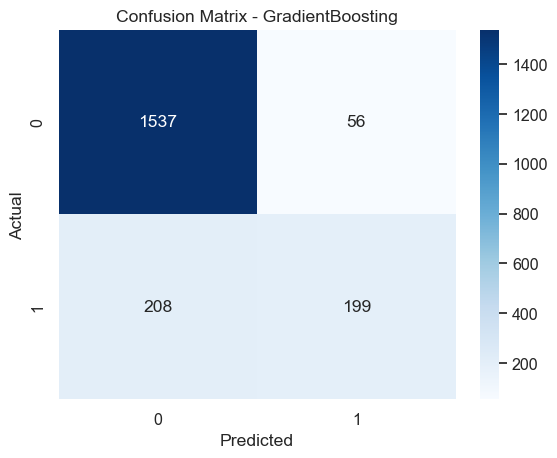

In [35]:
best_model = models[best_model_name]
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', best_model)])
best_pipeline.fit(X_train, y_train)

# Predictions
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test ROC AUC: {roc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# Step 10. Feature importance

age                     0.327665
products_number         0.266459
balance_per_product     0.063396
balance                 0.056953
active_member_0         0.052653
country_Germany         0.050689
active_member_1         0.047992
salary_balance_ratio    0.029992
estimated_salary        0.025547
credit_score            0.022685
age_group_45-54         0.020634
age_group_55-64         0.007968
gender_Female           0.006850
gender_Male             0.006532
tenure                  0.005683
country_France          0.003164
tenure_bracket_3-5      0.001564
age_group_35-44         0.001415
credit_card_1           0.000697
country_Spain           0.000577
dtype: float64

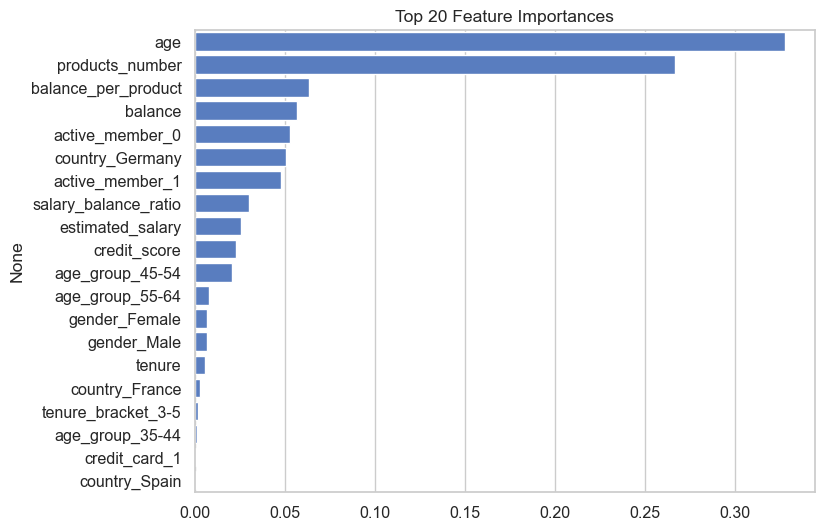

In [36]:
# this helps pinpoint why customers are leaving and what factors contribute most to churn.
# Feature importance extraction for tree-based models

if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
    num_feats = numeric_features
    cat_feats = list(best_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
    feature_names = num_feats + cat_feats
    importances = best_pipeline.named_steps['classifier'].feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
    display(fi)
    plt.figure(figsize=(8,6))
    sns.barplot(x=fi.values, y=fi.index)
    plt.title('Top 20 Feature Importances')
    plt.show()
else:
    print('Selected model does not provide feature_importances_ attribute.')

# Step 11. Save the best pipeline and preprocessing artifacts

In [37]:
# Save the best pipeline and preprocessing artifacts

joblib.dump(best_pipeline, 'best_churn_pipeline.pkl')
print("Saved pipeline: best_churn_pipeline.pkl")


Saved pipeline: best_churn_pipeline.pkl


# Step 12. Example: Predict churn for a new customer

In [39]:
# --- New customer sample ---
sample = {
    'customer_id': 373292028,
    'credit_score': 650,
    'country': 'France',
    'gender': 'Male',
    'age': 40,
    'tenure': 3,
    'balance': 50000.0,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 1,
    'estimated_salary': 60000.0
}

sample_dataframe = pd.DataFrame([sample])

# --- Apply same feature engineering ---
sample_dataframe['balance_per_product'] = sample_dataframe['balance'] / (sample_dataframe['products_number'].replace(0, np.nan))
sample_dataframe['balance_per_product'].fillna(0, inplace=True)

sample_dataframe['salary_balance_ratio'] = sample_dataframe['estimated_salary'] / (sample_dataframe['balance'].replace(0, np.nan))
sample_dataframe['salary_balance_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
sample_dataframe['salary_balance_ratio'].fillna(sample_dataframe['salary_balance_ratio'].median(), inplace=True)

bins = [0,25,35,45,55,65,100]
labels = ['<25','25-34','35-44','45-54','55-64','65+']
sample_dataframe['age_group'] = pd.cut(sample_dataframe['age'], bins=bins, labels=labels)

sample_dataframe['tenure_bracket'] = pd.cut(sample_dataframe['tenure'], bins=[-1,0,2,5,10,100], labels=['0','1-2','3-5','6-10','10+'])
sample_dataframe['high_balance'] = (sample_dataframe['balance'] > 50000.0).astype(int)  # can use 75th percentile of training set


# --- Drop ID ---
sample_dataframe = sample_dataframe.drop(columns=['customer_id'])

# --- Predict ---
prediction = best_pipeline.predict(sample_dataframe)[0]
probability = best_pipeline.predict_proba(sample_dataframe)[0,1]

print(f'Predicted churn: {prediction}, probability of churn: {probability:.3f}')

Predicted churn: 0, probability of churn: 0.030
